<a href="https://colab.research.google.com/github/hamednasr/PyTorch/blob/main/predicting_heart_disease_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease
https://archive.ics.uci.edu/ml/datasets/heart+disease

In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from IPython import display
from scipy import stats
import matplotlib.pyplot as plt
display.set_matplotlib_formats('svg')

## importing data

In [2]:
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                   header= None,
                   names = col_names)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## preprocessing and cleaning data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
data.describe(include='O')

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [5]:
data['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [6]:
data['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [7]:
data[data['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
data[data['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [9]:
data.drop(labels= data[data['ca']=='?'].index,inplace=True)

In [10]:
data.drop(labels= data[data['thal']=='?'].index,inplace=True)

In [11]:
data['ca'] = data['ca'].astype('float64')

In [12]:
data['thal'] = data['thal'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [15]:
data['num'] = data['num'].map({0:0 , 1:1, 2: 1, 3: 1, 4:1})

In [16]:
data['num'].value_counts()

0    160
1    137
Name: num, dtype: int64

In [17]:
values = data.iloc[:,:-1]
labels = data.iloc[:,-1]

In [18]:
values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [19]:
labels = labels.to_numpy()
labels

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [20]:
values[values.columns.drop(['sex','exang','fbs'])]

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63.0,1.0,145.0,233.0,2.0,150.0,2.3,3.0,0.0,6.0
1,67.0,4.0,160.0,286.0,2.0,108.0,1.5,2.0,3.0,3.0
2,67.0,4.0,120.0,229.0,2.0,129.0,2.6,2.0,2.0,7.0
3,37.0,3.0,130.0,250.0,0.0,187.0,3.5,3.0,0.0,3.0
4,41.0,2.0,130.0,204.0,2.0,172.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
297,57.0,4.0,140.0,241.0,0.0,123.0,0.2,2.0,0.0,7.0
298,45.0,1.0,110.0,264.0,0.0,132.0,1.2,2.0,0.0,7.0
299,68.0,4.0,144.0,193.0,0.0,141.0,3.4,2.0,2.0,7.0
300,57.0,4.0,130.0,131.0,0.0,115.0,1.2,2.0,1.0,7.0


In [21]:
values[values.columns.drop(['sex','exang','fbs'])] = \
       stats.zscore(values[values.columns.drop(['sex','exang','fbs'])],axis=0,ddof=1)

In [22]:
values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.934603,1.0,-2.236854,0.749116,-0.275978,1.0,1.008496,0.017465,0.0,1.067164,2.260330,-0.720760,0.654772
1,1.376605,1.0,0.872408,1.593577,0.743301,0.0,1.008496,-1.813274,1.0,0.381130,0.642696,2.474249,-0.892713
2,1.376605,1.0,0.872408,-0.658320,-0.352904,0.0,1.008496,-0.897904,1.0,1.324427,0.642696,1.409246,1.170601
3,-1.938409,1.0,-0.164013,-0.095345,0.050961,0.0,-1.001728,1.630258,0.0,2.096215,2.260330,-0.720760,-0.892713
4,-1.496407,0.0,-1.200433,-0.095345,-0.833696,0.0,1.008496,0.976423,0.0,0.295376,-0.974938,-0.720760,-0.892713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.271600,0.0,0.872408,0.467629,-0.122124,0.0,-1.001728,-1.159438,1.0,-0.733675,0.642696,-0.720760,1.170601
298,-1.054405,1.0,-2.236854,-1.221294,0.320204,0.0,-1.001728,-0.767137,0.0,0.123867,0.642696,-0.720760,1.170601
299,1.487106,1.0,0.872408,0.692818,-1.045244,1.0,-1.001728,-0.374836,0.0,2.010461,0.642696,1.409246,1.170601
300,0.271600,1.0,0.872408,-0.095345,-2.237607,0.0,-1.001728,-1.508150,1.0,0.123867,0.642696,0.344243,1.170601


## Create Tensor sets

In [23]:
values.values

array([[ 0.93460326,  1.        , -2.23685351, ...,  2.26033048,
        -0.72075958,  0.65477227],
       [ 1.37660512,  1.        ,  0.87240777, ...,  0.64269638,
         2.4742493 , -0.89271338],
       [ 1.37660512,  1.        ,  0.87240777, ...,  0.64269638,
         1.40924634,  1.17060082],
       ...,
       [ 1.48710558,  1.        ,  0.87240777, ...,  0.64269638,
         1.40924634,  1.17060082],
       [ 0.27160047,  1.        ,  0.87240777, ...,  0.64269638,
         0.34424338,  1.17060082],
       [ 0.27160047,  0.        , -1.20043309, ...,  0.64269638,
         0.34424338, -0.89271338]])

In [24]:
valuesT = torch.FloatTensor(values.values)
lablesT = torch.tensor(labels).float()
lablesT.shape

torch.Size([297])

In [25]:
lablesT = lablesT[:,None]
lablesT.shape

torch.Size([297, 1])

In [26]:
train_data,test_data,train_label,test_label = train_test_split(valuesT,lablesT,test_size=.1)

In [27]:
train_set = TensorDataset(train_data,train_label)
test_set = TensorDataset(test_data,test_label)

batchsize = 8
train_loader = DataLoader(train_set,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader = DataLoader(test_set,batch_size=test_set.tensors[0].shape[0])

## Create Model

In [28]:
def CreateModel():

  ANNheart = nn.Sequential(
      
                nn.Linear(13,256),
                nn.ReLU(),
                nn.Linear(256,256),
                nn.ReLU(),
                nn.Linear(256,128),
                nn.ReLU(),
                nn.Linear(128,1)
                            )
  
  lossfun = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.Adam(params=ANNheart.parameters(), lr = 0.0001)

  return ANNheart, lossfun, optimizer

### test the created model:

In [29]:
ANNheart, lossfun, optimizer = CreateModel()

X,y = next(iter(test_loader))
print('y is: ''',y)
yhat = ANNheart(X)
print('yhat is: ''',yhat)
print(y.bool())
accuracy = torch.mean(((yhat.detach()>0) == y.bool()).float())
print(accuracy)

y is:  tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]])
yhat is:  tensor([[-0.0216],
        [-0.0221],
        [-0.0148],
        [-0.0894],
        [-0.0181],
        [-0.0125],
        [-0.0208],
        [-0.0415],
        [-0.0729],
        [-0.0519],
        [-0.0254],
        [-0.0329],
        [-0.0764],
        [-0.0390],
        [-0.0250],
        [-0.0499],
        [-0.0634],
        [-0.0522],
        [-0.0133],
        [-0.0697],
        [-0.0668],
        [-0.0218],
        [-0.0158],
        [-0.0593],
        [-0.0462],
        [-0.0022],
        [-0.0570],
        [-0.0970],
        [-0.0021],
        [-0

### Train Model:

In [30]:
epochs = 100

def TrainModel():

  ANNheart, lossfun, optimizer = CreateModel()
    
  trainAcc =[]
  testAcc = []
  losses = []
  
  for i in range(epochs):

    batchAcc=[]
    batchloss=[]

    for X,y in train_loader:

      yhat = ANNheart(X)
      
      loss = lossfun(yhat,y)
      batchloss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(torch.mean(((yhat.detach()>0) == y.bool()).float())*100)

    trainAcc.append(np.mean(batchAcc))
    losses.append(np.mean(batchloss))

    X,y = next(iter(test_loader))
    yhat = ANNheart(X)
    testAcc.append(torch.mean(((yhat.detach()>0) == y.bool()).float())*100)

  return ANNheart, trainAcc, testAcc, losses

In [31]:
ANNheart, trainAcc, testAcc, losses = TrainModel()

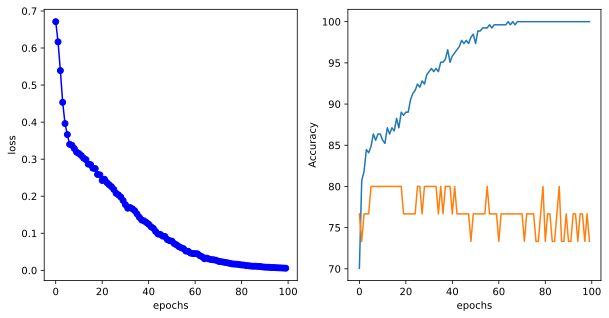

In [32]:
fig, ax =plt.subplots(1,2,figsize = (10,5))
ax[0].plot(losses,'bo-')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(trainAcc,label='train')
ax[1].plot(testAcc,label='test')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Accuracy')
plt.show()